In [171]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  

from sklearn.preprocessing import LabelEncoder , MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , classification_report 

from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.svm import SVC 
from sklearn. ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier 

about Dataset 

About Dataset
This dataset captures the pulse of viral social media trends across TikTok, Instagram, Twitter, and YouTube. It provides insights into the most popular hashtags, content types, and user engagement levels, offering a comprehensive view of how trends unfold across platforms. With regional data and influencer-driven content, this dataset is perfect for:

Trend analysis 🔍
Sentiment modeling 💭
Understanding influencer marketing 📈
Dive in to explore what makes content go viral, the behaviors that drive engagement, and how trends evolve on a global scale!

In [172]:
data =pd.read_csv("social_media_engagement1.csv") 
data 

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive
...,...,...,...,...,...,...,...,...,...
95,96,Instagram,carousel,7/12/2023 17:45,36,294,911,Wednesday,positive
96,97,Twitter,video,10/27/2023 23:45,314,108,458,Friday,neutral
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive
98,99,Instagram,poll,12/29/2023 12:15,5000,500,204,Friday,positive


In [173]:
data.duplicated().sum()

0

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [175]:
data.nunique()

post_id            100
platform             3
post_type            5
post_time           99
likes               93
comments            85
shares              96
post_day             7
sentiment_score      3
dtype: int64

In [176]:
data.columns

Index(['post_id', 'platform', 'post_type', 'post_time', 'likes', 'comments',
       'shares', 'post_day', 'sentiment_score'],
      dtype='object')

In [177]:
data.columns.nunique()

9

In [178]:
data.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [179]:
data.sample(10)

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
41,42,Instagram,video,11/23/2023 2:00,4929,252,730,Thursday,negative
28,29,Facebook,image,1/7/2023 10:30,548,153,731,Saturday,negative
8,9,Facebook,video,5/2/2023 6:15,317,249,221,Tuesday,neutral
15,16,Twitter,image,2/10/2023 13:00,2348,154,18,Friday,neutral
16,17,Instagram,poll,7/5/2023 5:15,2872,10,736,Wednesday,positive
62,63,Twitter,image,5/15/2023 6:30,227,163,127,Monday,neutral
93,94,Facebook,image,11/27/2023 4:30,1694,207,290,Monday,positive
53,54,Instagram,image,1/21/2023 1:00,4297,360,825,Saturday,negative
50,51,Twitter,text,2/14/2023 18:00,1268,73,251,Tuesday,positive
97,98,Twitter,text,8/5/2023 8:45,229,179,38,Saturday,positive


In [180]:
data.describe().round(2)

,post_id,likes,comments,shares
count,100.00,100.00,100.00,100.00
mean,50.50,2381.81,202.66,415.65
std,29.01,1632.57,138.84,283.88
min,1.00,15.00,10.00,16.00
25%,25.75,895.75,89.75,183.00
50%,50.50,2220.00,171.00,356.50
75%,75.25,3593.25,299.00,689.50
max,100.00,5000.00,500.00,993.00


In [181]:
data.drop("post_id" ,axis=1 , inplace=True) 

In [182]:
data.describe().round(2)

,likes,comments,shares
count,100.00,100.00,100.00
mean,2381.81,202.66,415.65
std,1632.57,138.84,283.88
min,15.00,10.00,16.00
25%,895.75,89.75,183.00
50%,2220.00,171.00,356.50
75%,3593.25,299.00,689.50
max,5000.00,500.00,993.00


In [183]:
data.head()

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [184]:
data.isnull().sum()

platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64

In [185]:
for col in data.columns:
    print(col , ":")
    Min = data[col].min()
    Max = data[col].max()
    print("the min" , Min)
    print("--------------")
    print("the max" , Max) 

platform :
the min Facebook
--------------
the max Twitter
post_type :
the min carousel
--------------
the max video
post_time :
the min 1/1/2023 20:00
--------------
the max 9/30/2023 10:30
likes :
the min 15
--------------
the max 5000
comments :
the min 10
--------------
the max 500
shares :
the min 16
--------------
the max 993
post_day :
the min Friday
--------------
the max Wednesday
sentiment_score :
the min negative
--------------
the max positive


In [186]:
data.head()

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


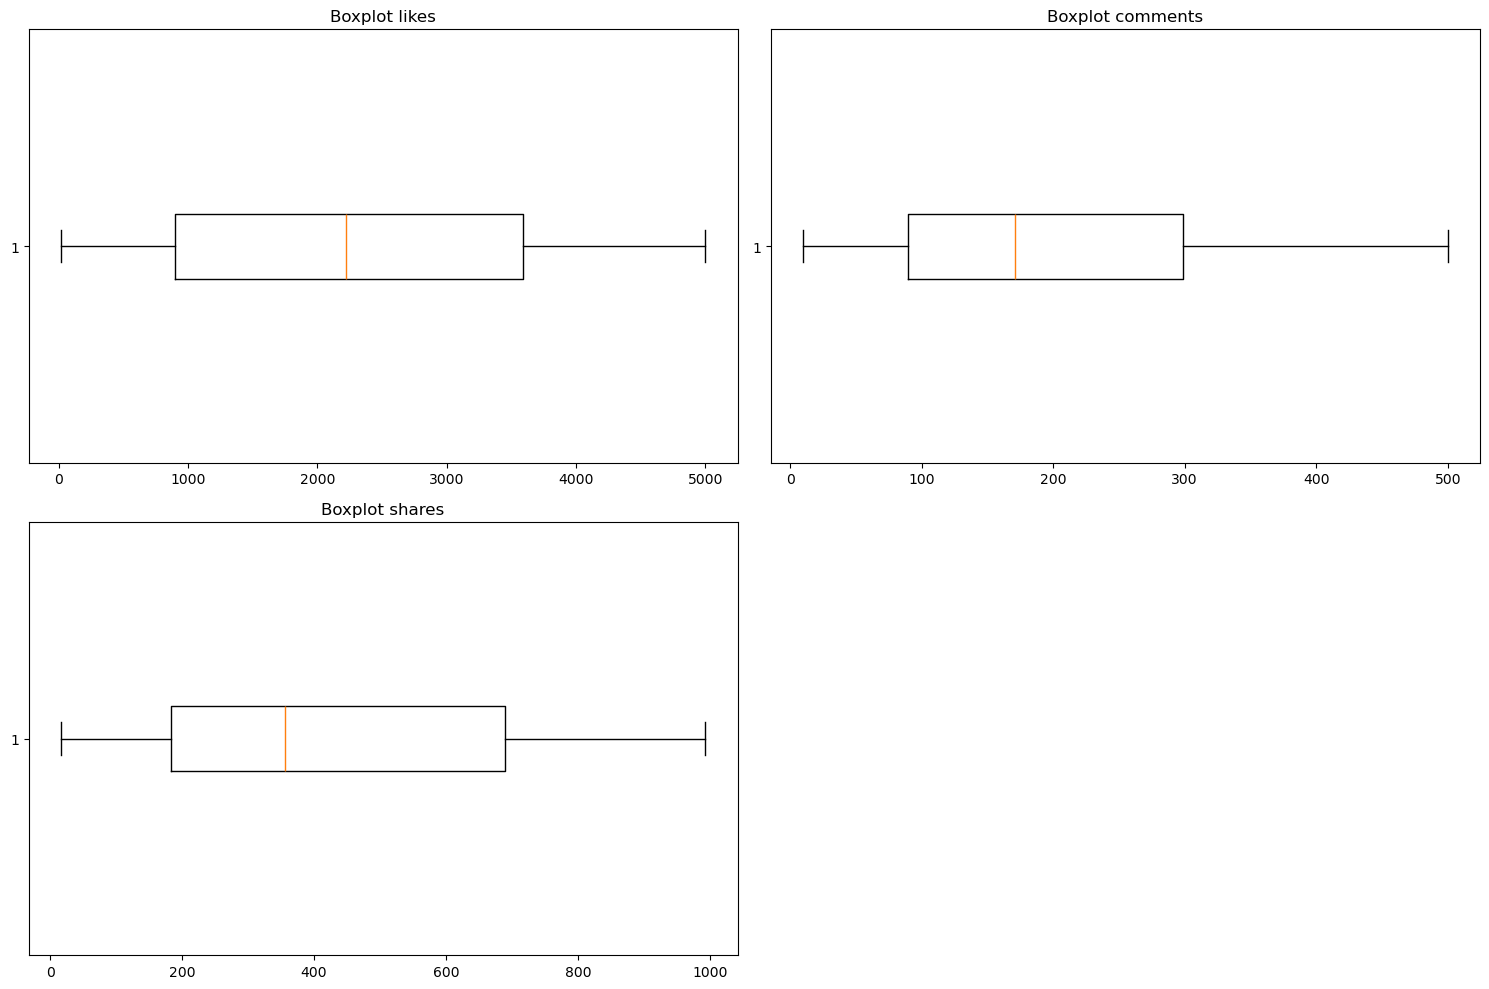

In [187]:
numerical_feature = ["likes" , "comments" , "shares"]


plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_feature, 1):
    plt.subplot(2, 2, i) 
    plt.boxplot(data[feature], vert=False)
    plt.title(f"Boxplot {feature}")

plt.tight_layout()
plt.show()


In [188]:
data.platform.value_counts()

platform
Instagram    36
Facebook     32
Twitter      32
Name: count, dtype: int64

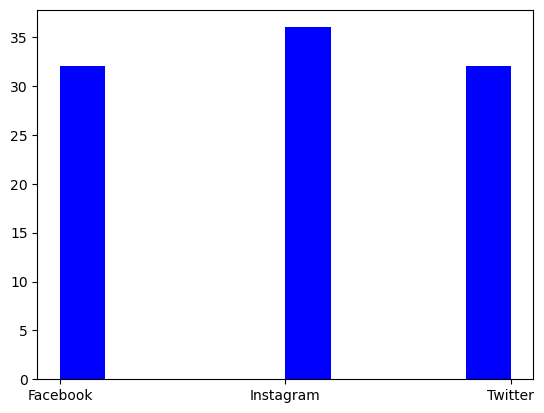

In [189]:
plt.hist(data.platform , color="blue" )
plt.show()

In [190]:
data.post_type.value_counts()

post_type
carousel    26
video       23
text        21
image       17
poll        13
Name: count, dtype: int64

<Axes: ylabel='count'>

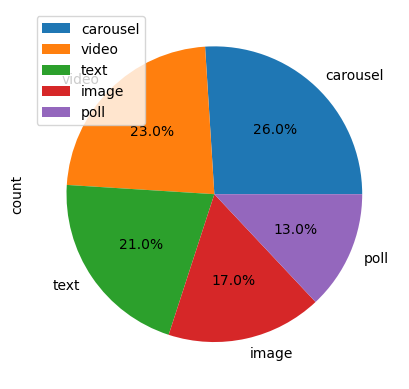

In [191]:
data.post_type.value_counts().plot(kind="pie" , autopct ="%1.1f%%",legend=True)

In [192]:
data["post_time"].dtypes

dtype('O')

In [193]:
data["post_time"] = pd.to_datetime(data.post_time)

In [194]:
data["day"] = data["post_time"].dt.day 

In [195]:
data["month"] = data["post_time"].dt.month

In [196]:
data["year"] = data["post_time"].dt.year
data.head()

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,day,month,year
0,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive,17,8,2023
1,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral,14,5,2023
2,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,21,2,2023
3,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative,16,11,2023
4,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive,23,5,2023


In [197]:
data["month_year"] = data["post_time"].dt.to_period("m")

C:\Users\Win_11\AppData\Local\Temp\ipykernel_7780\1667184819.py:1: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'M' instead.
  data["month_year"] = data["post_time"].dt.to_period("m")


In [198]:
data.head()

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,day,month,year,month_year
0,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive,17,8,2023,2023-08
1,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral,14,5,2023,2023-05
2,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,21,2,2023,2023-02
3,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative,16,11,2023,2023-11
4,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive,23,5,2023,2023-05


In [199]:
data['post_time'] = data['post_time'].dt.date

In [200]:
data.head()

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,day,month,year,month_year
0,Facebook,image,2023-08-17,2121,474,628,Thursday,positive,17,8,2023,2023-08
1,Facebook,carousel,2023-05-14,3660,432,694,Sunday,neutral,14,5,2023,2023-05
2,Instagram,poll,2023-02-21,4955,408,688,Tuesday,negative,21,2,2023,2023-02
3,Twitter,image,2023-11-16,1183,90,187,Thursday,negative,16,11,2023,2023-11
4,Twitter,video,2023-05-23,3499,247,286,Tuesday,positive,23,5,2023,2023-05


<Axes: xlabel='month_year'>

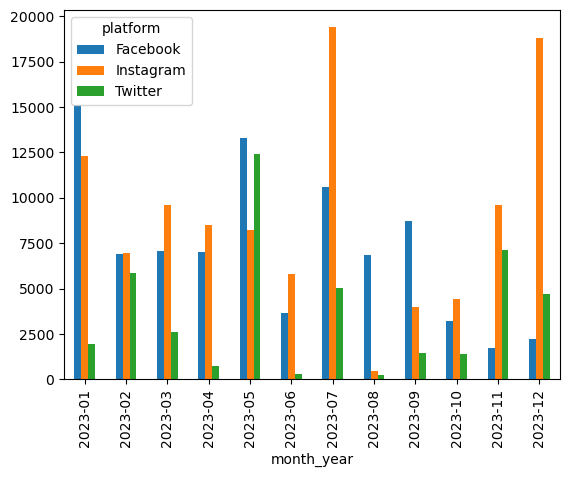

In [201]:
data.groupby(["month_year" , "platform"]).likes.sum().unstack().plot(kind="bar")

<Axes: xlabel='month_year'>

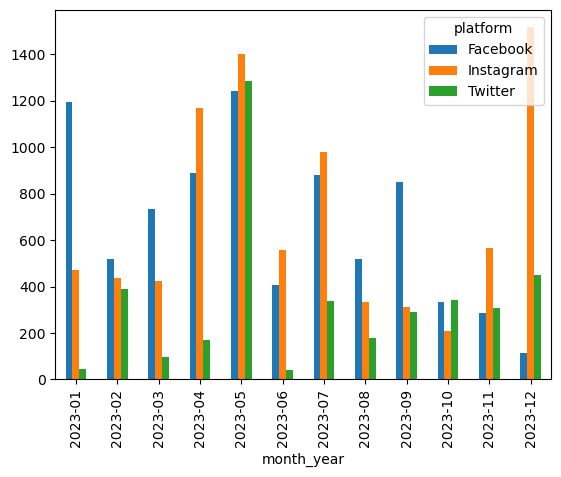

In [202]:
data.groupby(["month_year" , "platform"]).comments.sum().unstack().plot(kind="bar")

<Axes: xlabel='platform'>

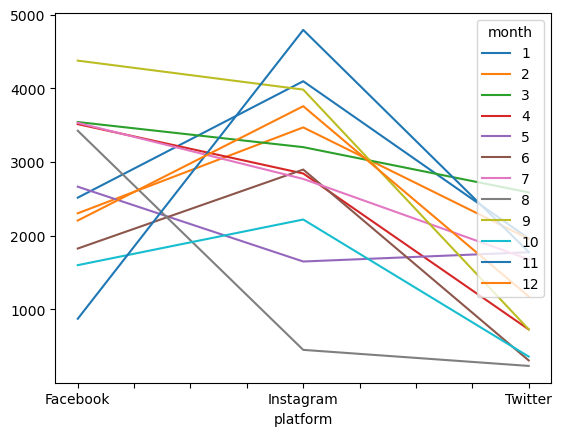

In [203]:
data.groupby(["platform" , "month"]).likes.mean().unstack().plot(kind="line")

In [204]:
data.groupby(["day" , "platform"]).likes.mean().unstack().fillna(0)

platform,Facebook,Instagram,Twitter
day,,,
1,3541.500000,4832.500000,2236.000000
2,386.000000,0.000000,986.500000
3,2866.500000,0.000000,2884.000000
4,2642.000000,447.000000,0.000000
5,1841.000000,1564.000000,1900.000000
6,2566.000000,3442.400000,0.000000
7,548.000000,1978.000000,0.000000
8,4863.000000,0.000000,1446.000000
9,889.000000,0.000000,2253.000000


<Axes: xlabel='year', ylabel='month'>

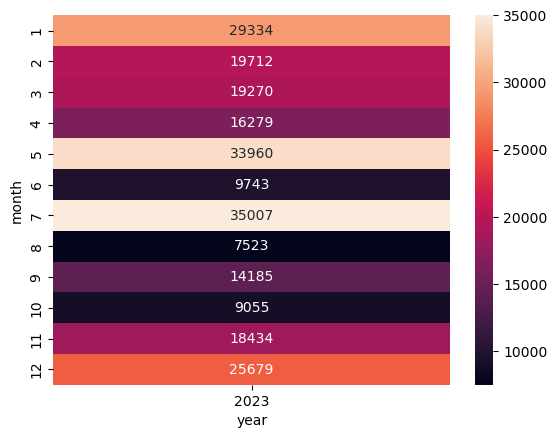

In [205]:
pivot=data.pivot_table(index="month" , columns="year" , values="likes"  ,aggfunc="sum") 
sns.heatmap(pivot , annot=True , fmt="0.0f")


<Axes: xlabel='platform'>

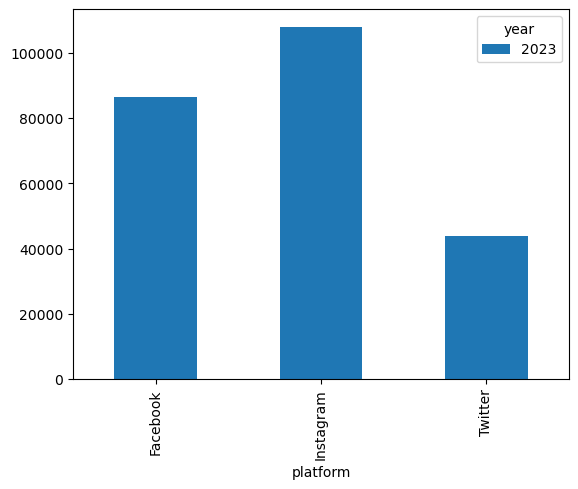

In [206]:
data.groupby(["platform" , "year"]).likes.sum().unstack().plot(kind="bar")

In [207]:
data.likes.min()

15

In [208]:
data.likes.max ()

5000

In [209]:
data.likes.mean()

2381.81

In [210]:
data.likes.std()

1632.5732844781944

In [211]:
data.comments.mean()

202.66

In [212]:
data.comments.max()

500

In [213]:
data.comments.std()

138.8406702561311

In [214]:
data.comments.min()

10

In [215]:
data.shares.min()

16

In [216]:
data.shares.mean()

415.65

In [217]:
data.shares.max()

993

In [218]:
data.shares.std()

283.8776011316187

In [219]:
data.head()

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,day,month,year,month_year
0,Facebook,image,2023-08-17,2121,474,628,Thursday,positive,17,8,2023,2023-08
1,Facebook,carousel,2023-05-14,3660,432,694,Sunday,neutral,14,5,2023,2023-05
2,Instagram,poll,2023-02-21,4955,408,688,Tuesday,negative,21,2,2023,2023-02
3,Twitter,image,2023-11-16,1183,90,187,Thursday,negative,16,11,2023,2023-11
4,Twitter,video,2023-05-23,3499,247,286,Tuesday,positive,23,5,2023,2023-05


In [220]:
data.post_day.value_counts()

post_day
Wednesday    18
Thursday     16
Friday       16
Tuesday      15
Sunday       14
Monday       11
Saturday     10
Name: count, dtype: int64

In [221]:
data.sentiment_score.value_counts()

sentiment_score
positive    46
neutral     27
negative    27
Name: count, dtype: int64

In [222]:
pd.crosstab(data.platform , data.post_type)

post_type,carousel,image,poll,text,video
platform,,,,,
Facebook,10,4,3,6,9
Instagram,9,7,6,7,7
Twitter,7,6,4,8,7


In [223]:
data.groupby(["post_type" , "platform"])["sentiment_score"].sum().unstack()

platform,Facebook,Instagram,Twitter
post_type,,,
carousel,neutralnegativepositivenegativepositivenegativ...,neutralpositivenegativepositiveneutralpositive...,neutralpositivepositivepositiveneutralpositive...
image,positivepositivenegativepositive,positivepositivenegativenegativenegativepositi...,negativeneutralneutralpositiveneutralneutral
poll,neutralnegativenegative,negativepositivepositivenegativepositivepositive,neutralpositivepositivepositive
text,positivenegativepositivepositiveneutralpositive,neutralpositivenegativepositivenegativeneutral...,negativepositiveneutralpositivepositivepositiv...
video,neutralpositiveneutralneutralnegativeneutralpo...,negativeneutralnegativenegativeneutralpositive...,positivepositivepositivepositivepositiveneutra...


In [224]:
pd.crosstab(data.post_type , data.platform , values=data.post_day , aggfunc="sum")

platform,Facebook,Instagram,Twitter
post_type,,,
carousel,SundaySaturdayMondayThursdayFridayFridaySunday...,FridaySundayFridayFridayWednesdayWednesdaySund...,ThursdayMondayWednesdayFridayMondayWednesdayWe...
image,ThursdayThursdaySaturdayMonday,SundaySaturdayTuesdaySaturdayMondayWednesdayTu...,ThursdayFridayMondayFridayMondaySaturday
poll,WednesdaySundayTuesday,TuesdayWednesdayThursdaySundayTuesdayFriday,TuesdayWednesdayThursdayTuesday
text,TuesdayMondayTuesdaySundayThursdayWednesday,SaturdayFridayThursdayTuesdayWednesdayThursday...,FridaySaturdaySundayMondayMondayTuesdaySaturda...
video,TuesdaySaturdayThursdaySundayWednesdayWednesda...,ThursdayThursdaySundayThursdayMondayFridayWedn...,TuesdayThursdayWednesdayFridaySundaySundayFriday


In [225]:
data.groupby(["shares" , "post_type" ,"platform"]).sentiment_score.sum().unstack().fillna(0)

,platform,Facebook,Instagram,Twitter
shares,post_type,,,
16,video,negative,0,0
18,image,0,0,neutral
25,image,0,neutral,0
28,poll,0,0,positive
38,text,0,0,positive
...,...,...,...,...
956,carousel,0,positive,0
965,text,negative,0,0
978,poll,negative,0,0


<Axes: ylabel='count'>

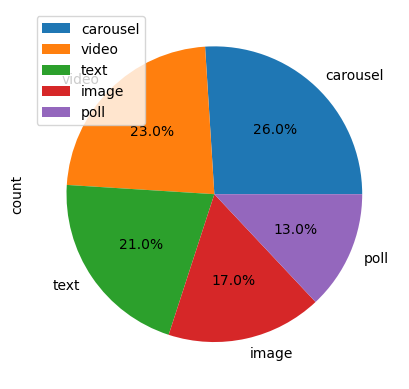

In [226]:
data.post_type.value_counts().plot(kind="pie" , autopct ="%1.1f%%",legend=True)

In [227]:
data.head()

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,day,month,year,month_year
0,Facebook,image,2023-08-17,2121,474,628,Thursday,positive,17,8,2023,2023-08
1,Facebook,carousel,2023-05-14,3660,432,694,Sunday,neutral,14,5,2023,2023-05
2,Instagram,poll,2023-02-21,4955,408,688,Tuesday,negative,21,2,2023,2023-02
3,Twitter,image,2023-11-16,1183,90,187,Thursday,negative,16,11,2023,2023-11
4,Twitter,video,2023-05-23,3499,247,286,Tuesday,positive,23,5,2023,2023-05


In [228]:
data.to_csv("social_media", index=False,encoding="utf-8")